# Point distributions in n-dimensional spaces, the unusual behavior of distance metics as dimensionality increases

Demonstration of diminished distance ratio between nearest and furthest points as dimensionality increases.
> In recent years, the effect of the curse of high dimensionality has been studied in great detail on several problems such as clustering, nearest neighbor search, and indexing. In high dimensional space the data becomes sparse, and traditional indexing and algorithmic techniques fail from a effciency and/or effectiveness perspective. Recent research results show that in high dimensional space, the concept of proximity, distance or nearest neighbor may not even be qualitatively meaningful. In this paper, we view the dimensionality curse from the point of view of the distance metrics which are used to measure the similarity between objects. We specifically examine the behavior of the commonly used L k norm and show that the problem of meaningfulness in high dimensionality is sensitive to the value of k. For example, this means that the Manhattan distance metric L(1 norm) is consistently more preferable than the Euclidean distance metric L(2 norm) for high dimensional data mining applications. Using the intuition derived from our analysis, we introduce and examine a natural extension of the L k norm to fractional distance metrics. We show that the fractional distance metric provides more meaningful results both from the theoretical and empirical perspective. The results show that fractional distance metrics can significantly improve the effectiveness of standard clustering algorithms such as the k-means algorithm.

Aggarwal, Charu C., Alexander Hinneburg, and Daniel A. Keim. "On the surprising behavior of distance metrics in high dimensional space." In International conference on database theory, pp. 420-434. Springer, Berlin, Heidelberg, 2001.

## Imports

In [8]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

from typing import List
import warnings

warnings.filterwarnings("ignore")

## Distance calculations

In [9]:
def l_sub_p_norm(p1: np.ndarray, p2: np.ndarray, norm_p: int = 2) -> float:
    """
    L1 norm corresponds with Manhattan distance (the distance along each axis summed independently),
    L2 corresponds to the common Euclidean distance, higher and lower order norms correspond to 
    identical calculations with different powers
    
    Source:
        https://en.wikipedia.org/wiki/Lp_space
    
    Args:
        p1 (np.ndarray): first point (numpy array where each value corresponds to an independent dimension)
        p2 (np.ndarray): second point (numpy array where each value corresponds to an independent dimension)
        norm_p (int): the 'p' of the l sub p norm
    
    Returns:
        float: an l sub p distance metric in the n dimensional space
    """
    
    # make sure that the input points are of identical dimensionality
    if p1.shape != p2.shape:
        print('replace with warning')
        
    magnitudes = np.absolute(p1 - p2)
    exponentiated = np.power(magnitudes, norm_p)
    summed = np.sum(exponentiated)
    
    inverse_power = np.power(summed, 1/norm_p)

    return inverse_power

## Generate normally distributed points in n-dimensional space

In [10]:
def generate_points(n_points: int, dimensions: List[int]) -> np.ndarray:
    """
    Generator of points in n-dimensional spaces (0 centered, iid normal)
    
    Args:
        n_points (int): number of points to generate
        dimensions (List[int]): number of dimensions  
    
    Returns:
        np.ndarray: points distributed in n-dimensional space, 
        0th axis represented point samples, 1st dimension representing independent dimensions
    """
    
    return normal(size=(n_points, dimensions))

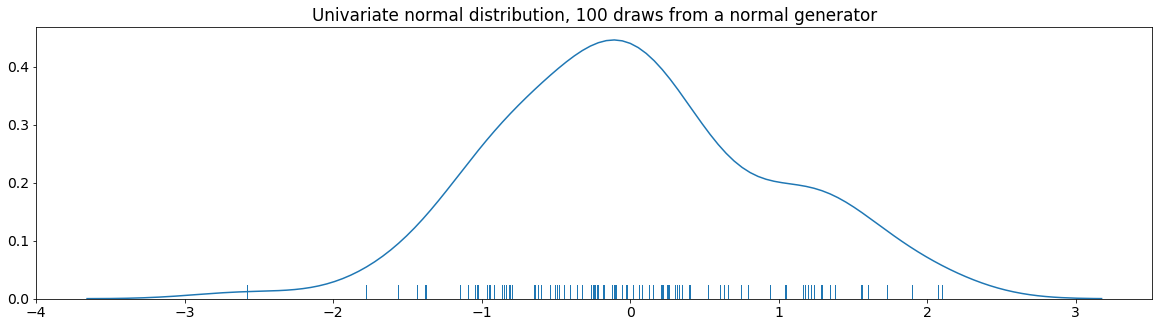

In [20]:
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,5))
sns.distplot(generate_points(100,1), hist=False, rug=True)
plt.title('Univariate normal distribution, 100 draws from a normal generator')
plt.show()

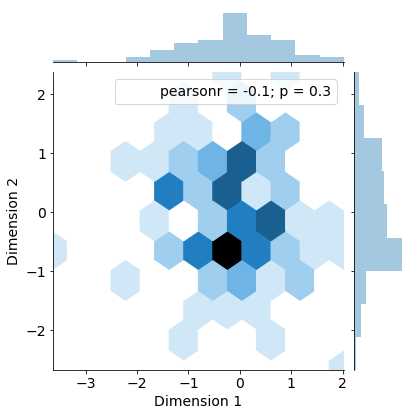

In [16]:
matplotlib.rcParams.update({'font.size': 14})
sns.jointplot(x="Dimension 1", y="Dimension 2", kind='hex',
              data=pd.DataFrame(generate_points(100,2), columns=['Dimension 1', 'Dimension 2']))
plt.show()

In [6]:
def distance_ratio(points: np.ndarray, norm_p: int = 2) -> float:
    """
    Calculate ratio of norm distance between the two nearest points and the two furthest points in the 
    normally distributed point space
    
    Args:
        points (np.ndarray): points, rows correspond to samples and columns correspond to dimensions
        norm_p (int): norm defining distance metric to be used
    Returns:
        float: ratio (nearest point distance / furthest point distance)
    """
    
    max_distance = None
    min_distance = None
    
    for ind, point_1 in enumerate(points):
        for point_2 in points[ind+1:]:
            
            # calculate distance, some norm
            d = l_sub_p_norm(point_1, point_2, norm_p)
        
            # distance calculations
            max_distance = d if max_distance is None or d > max_distance else max_distance
            min_distance = d if min_distance is None or d < min_distance else min_distance
            
    return min_distance / max_distance

## Collapse of L2 norm in high dimensional spaces

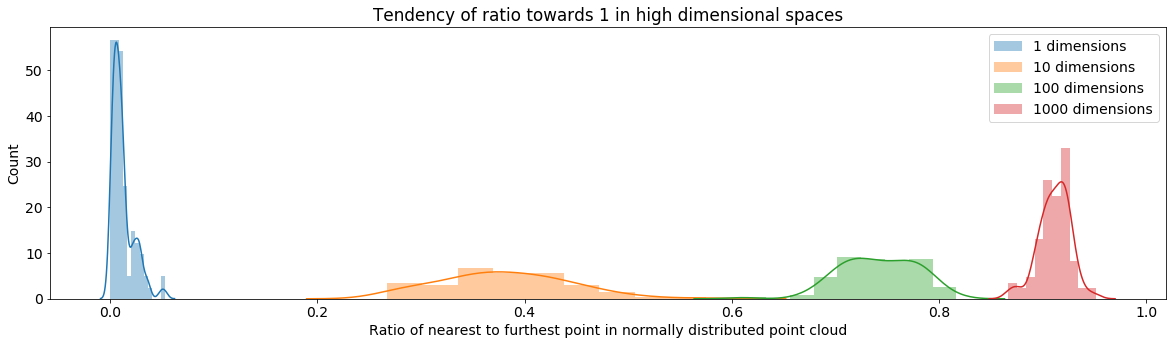

In [18]:
dimensions = [1, 10, 100, 1000]
NUM_SIMULATIONS = 100
NUM_POINTS = 10

distance_ratios = np.zeros(shape=(NUM_SIMULATIONS, len(dimensions)))

for sim in range(NUM_SIMULATIONS):
    for ind, dimension in enumerate(dimensions):
        
        # calculate the L2 distance for the points
        r = distance_ratio(generate_points(NUM_POINTS, dimension))
        distance_ratios[sim, ind] = r
       
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,5))
for ind in range(len(dimensions)):
    sns.distplot(distance_ratios[:,ind])

plt.title('Tendency of ratio towards 1 in high dimensional spaces (L2 norm)')
plt.xlabel('Ratio of nearest to furthest point in normally distributed point cloud')
plt.ylabel('Count')
plt.legend([f'{d} dimensions' for d in dimensions])
plt.show()

## Improved performance of fractional norms

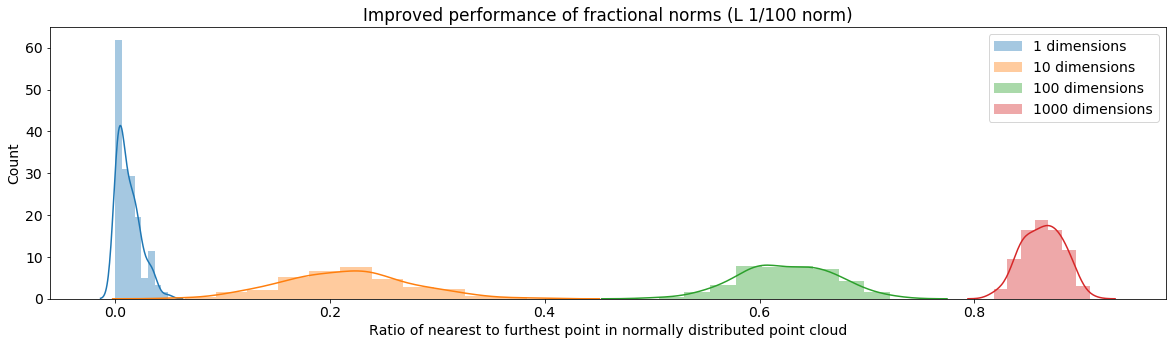

In [34]:
dimensions = [1, 10, 100, 1000]
NUM_SIMULATIONS = 100
NUM_POINTS = 10

distance_ratios = np.zeros(shape=(NUM_SIMULATIONS, len(dimensions)))

for sim in range(NUM_SIMULATIONS):
    for ind, dimension in enumerate(dimensions):
        
        # calculate the L2 distance for the points
        r = distance_ratio(generate_points(NUM_POINTS, dimension), norm_p=1/100)
        r = r if not np.isnan(r) else 0
        distance_ratios[sim, ind] = r
       
matplotlib.rcParams.update({'font.size': 14})
plt.figure(figsize=(20,5))
for ind in range(len(dimensions)):
    sns.distplot(distance_ratios[:,ind])

plt.title('Improved performance of fractional norms (L 1/100 norm)')
plt.xlabel('Ratio of nearest to furthest point in normally distributed point cloud')
plt.ylabel('Count')
plt.legend([f'{d} dimensions' for d in dimensions])
plt.show()